# **Concept Activation Vectors (CAVs) example on CIFAR data**

## **1. Abstract**



Aim of the nootebook is see how to use concept activation vectors (CAVs) on some popular image data -- the CIFAR datasets. These datasets are available through the keras package.

For our first experiment, we will build a classifier that distinguishes between "ship" and "bird" images from CIFAR-10. We start by calling the necessary libraries and data.

Befor running the next cell just upload TCAV floder from offical tensorflow github or from our github  link

In [0]:
import zipfile
with zipfile.ZipFile("/content/cav-keras-master.zip","r") as zip_ref:
    zip_ref.extractall()

In [0]:
%cd /content/cav-keras-master/

/content/cav-keras-master


Install all the requirements

In [0]:
!pip3 install -r requirements.txt

     |████████████████████████████████| 20.4MB 1.5MB/s 
     |████████████████████████████████| 337kB 49.4MB/s 
     |████████████████████████████████| 109.2MB 107kB/s 
     |████████████████████████████████| 3.2MB 45.2MB/s 
     |████████████████████████████████| 491kB 51.6MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.18.2
    Uninstalling numpy-1.18.2:
      Successfully uninstalled numpy-1.18.2
  Found existing installation: Keras 2.3.1
    Uninstalling Keras-2.3.1:
      Successfully uninstalled Keras-2.3.1
  Found existing installation: tensorboard 2.2.1
    Uninstalling tensorboard-2.2.1:
      Successfully uninstalled tensorboard-2.2.1
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully 

## **2. Importing necessary libraries**


In [0]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.datasets import cifar100, cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

import sys
import os
sys.path.insert(0, os.path.abspath('../..'))

from cav.tcav import *



np.random.seed(1996)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a

## **3. Data preprocessing**

In [0]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Keep ships (8) from CIFAR-10
interested_class = y_train == [8]
interested_class_indx = [i for i, x in enumerate(interested_class) if x]
x_train_class_one = x_train[interested_class_indx]
other = y_train == [2]
other_indx = [i for i, x in enumerate(other) if x]
x_train_class_two = x_train[other_indx]

x_train = np.append(x_train_class_one, x_train_class_two, axis = 0)
y_train = [1] * 5000
y_train = y_train + [0] * 5000

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

170500096/170498071 [==============================] - 6s 0us/step


We can see two examples images below. This is a fairly easy classification problem.

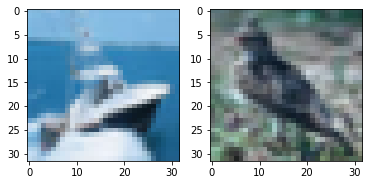

In [0]:
f, axarr = plt.subplots(1,2)
axarr[0].imshow(x_train[0])
axarr[1].imshow(x_train[7777])

Now, let's say we are interested in how sensitive each class is to the concept of the "ocean". Clearly, the ship class, which we designate as 1, will likely be more sensitive.

In [0]:
(x_train_concept, y_train_concept), (x_test_concept, y_test_concept) = cifar100.load_data()

# keep sea (71) from CIFAR-100
concept = y_train_concept == [71]
indices = concept
indx_to_use = [i for i, x in enumerate(indices) if x]

x_train_concept = x_train_concept[indx_to_use]

169009152/169001437 [==============================] - 9s 0us/step


## **4. Training the model**

Finally, we train and summarize our model. This is the standard classifier that the Keras team provides for CIFAR-10.

In [0]:
batch_size = 32
epochs = 5

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

# initiate optimizer
opt = keras.optimizers.Adam(lr=0.001)

# train the model
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, shuffle=True)






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/5
10000/10000 [==============================] - 52s 5ms/step - loss: 0.3542 - acc: 0.8420
Epoch 2/5
10000/10000 [==============================] - 52s 5ms/step - loss: 0.2116 - acc: 0.9182
Epoch 3/5
10000/10000 [==============================] - 51s 5ms/step - loss: 0.1814 - acc: 0.9268
Epoch 4/5
10000/10000 [==============================] - 53s 5ms/step - loss: 0.1680 - acc: 0.9368
Epoch 5/5
10000/10000 [==============================] - 52s 5ms/step - loss: 0.1435 - acc: 0.9458


In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)       

## **5. Instantiate the TCAV object**
The first thing one should do when using TCAV is assign it a model. There are two ways to do this: (1) use the .set_model(model) method OR (2) create a TCAV object using TCAV(model = model). Please note that model should be a Keras sequential model.

In [0]:
tcav_obj = TCAV()
tcav_obj.set_model(model)

Next, we must specify the "bottleneck" layer, and if that layer is a convolutional layer. One can split the model in the object through the .split_model(bottleneck, conv_layer) method. Please note that you should split on the last activation/pooling/dropout layer. So, we can split on layers 1, 5, 7 and 11 (starting counting from 0).

One the model has been split on the specified bottleneck layer, one must train the concept activation vector. This is done through the .train_cav(x_concept) method, which is passed the concept training data. In our case, this is the numpy array of sea images from CIFAR-100. The TCAV object takes care of creating counterexamples.

Next, we calculate the sensitivities for our training data through the .calculate_sensitivity(x_train, y_labels) method. This method saves the sensitivities for each training object in the Object.sensitivity attribute.

Finally, to print the sensitivities, simply use the .print_sensitivity() method.

In [0]:
tcav_obj.split_model(bottleneck = 1, conv_layer = True)
tcav_obj.train_cav(x_train_concept)
tcav_obj.calculate_sensitivity(x_train, y_train)
tcav_obj.print_sensitivity()

The sensitivity of class 1 is  0.9896
The sensitivity of class 0 is  0.0036


In [0]:
tcav_obj.split_model(bottleneck = 5, conv_layer = True)
tcav_obj.train_cav(x_train_concept)
tcav_obj.calculate_sensitivity(x_train, y_train)
tcav_obj.print_sensitivity()

The sensitivity of class 1 is  0.9136
The sensitivity of class 0 is  0.1626


In [0]:
tcav_obj.split_model(bottleneck = 7, conv_layer = True)
tcav_obj.train_cav(x_train_concept)
tcav_obj.calculate_sensitivity(x_train, y_train)
tcav_obj.print_sensitivity()

The sensitivity of class 1 is  0.5254
The sensitivity of class 0 is  0.0154


In [0]:
tcav_obj.split_model(bottleneck = 11, conv_layer = True)
tcav_obj.train_cav(x_train_concept)
tcav_obj.calculate_sensitivity(x_train, y_train)
tcav_obj.print_sensitivity()

The sensitivity of class 1 is  0.9998
The sensitivity of class 0 is  0.0002


Above, we clearly see that the **sea** is a strong concept for class 1, which is the ship. Interestingly, the last layer gives a strong sensitivity to class 0, birds.

### **5.1. CloudsNext**

we can use another example, which uses airplanes and birds. Our concept will be "clouds".

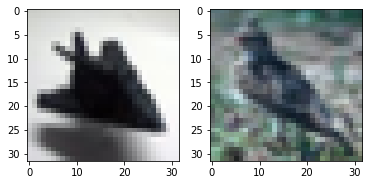

In [0]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Keep airplanes from CIFAR-10
interested_class = y_train == [0]
interested_class_indx = [i for i, x in enumerate(interested_class) if x]
x_train_class_one = x_train[interested_class_indx]
other = y_train == [2]
other_indx = [i for i, x in enumerate(other) if x]
x_train_class_two = x_train[other_indx]

x_train = np.append(x_train_class_one, x_train_class_two, axis = 0)
y_train = [1] * 5000
y_train = y_train + [0] * 5000

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

f, axarr = plt.subplots(1,2)
axarr[0].imshow(x_train[0])
axarr[1].imshow(x_train[7777])

In [0]:
(x_train_concept, y_train_concept), (x_test_concept, y_test_concept) = cifar100.load_data()

# keep cloud (23) from CIFAR-100
concept = y_train_concept == [23]
indices = concept
indx_to_use = [i for i, x in enumerate(indices) if x]

x_train_concept = x_train_concept[indx_to_use]

In [0]:
# Set parameters
batch_size = 32
epochs = 5

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

# initiate optimizer
opt = keras.optimizers.Adam(lr=0.001)

# train the model
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, shuffle=True)

Epoch 1/5
10000/10000 [==============================] - 45s 4ms/step - loss: 0.4618 - acc: 0.7824
Epoch 2/5
10000/10000 [==============================] - 44s 4ms/step - loss: 0.3575 - acc: 0.8500
Epoch 3/5
10000/10000 [==============================] - 44s 4ms/step - loss: 0.3260 - acc: 0.8643
Epoch 4/5
10000/10000 [==============================] - 43s 4ms/step - loss: 0.2955 - acc: 0.8757
Epoch 5/5
10000/10000 [==============================] - 46s 5ms/step - loss: 0.2781 - acc: 0.8840


In [0]:
tcav_obj = TCAV()
tcav_obj.set_model(model)

In [0]:
tcav_obj.split_model(bottleneck = 1, conv_layer = True)
tcav_obj.train_cav(x_train_concept)
tcav_obj.calculate_sensitivity(x_train, y_train)
tcav_obj.print_sensitivity()

The sensitivity of class 1 is  0.7726
The sensitivity of class 0 is  0.212


In [0]:
tcav_obj.split_model(bottleneck = 5, conv_layer = True)
tcav_obj.train_cav(x_train_concept)
tcav_obj.calculate_sensitivity(x_train, y_train)
tcav_obj.print_sensitivity()

The sensitivity of class 1 is  0.9102
The sensitivity of class 0 is  0.2772


In [0]:
tcav_obj.split_model(bottleneck = 7, conv_layer = True)
tcav_obj.train_cav(x_train_concept)
tcav_obj.calculate_sensitivity(x_train, y_train)
tcav_obj.print_sensitivity()

The sensitivity of class 1 is  0.577
The sensitivity of class 0 is  0.0116


In [0]:
tcav_obj.split_model(bottleneck = 11, conv_layer = True)
tcav_obj.train_cav(x_train_concept)
tcav_obj.calculate_sensitivity(x_train, y_train)
tcav_obj.print_sensitivity()

The sensitivity of class 1 is  0.9998
The sensitivity of class 0 is  0.0


We can see that airplanes do have a high sensitivity to the "cloud" concept, as do birds in the early layers.


## **6. Conclusion and Future Work**

TCAV is way towards making the deep learning model more human understanding and easily comprehend what is happening in the model. 


### **7. Refrence** 


1. https://www.tensorflow.org/
2. https://www.youtube.com/watch?v=lyRPyRKHO8M&vl=en
3. https://research.google/pubs/pub47077/

Copyright 2020 Abhishek Gargha Maheshwarappa and Kartik Kumar

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.